# present raw data

In [1]:
from pathlib import Path
from pprint import pprint
import yaml

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [18, 6]
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.which'] = 'both'

In [2]:
from pandas_utils import extract_interval_end_from_text, text_interval_index_to_interval_index, reduce_histogram_resolution, closed_ranges_to_interval_index, rougher_binning
import parameters

path_data = Path("../data")

In [3]:
df = pd.read_csv(path_data.joinpath('our_world_in_data_corona/full_data.csv'), index_col=[1, 0], parse_dates=True)
df

new_cases  new_deaths  total_cases  total_deaths
location    date                                                        
Afghanistan 2019-12-31          0           0            0             0
            2020-01-01          0           0            0             0
            2020-01-02          0           0            0             0
            2020-01-03          0           0            0             0
            2020-01-04          0           0            0             0
...                           ...         ...          ...           ...
Zimbabwe    2020-03-31          0           0            7             1
            2020-04-01          1           0            8             1
            2020-04-02          0           0            8             1
            2020-04-03          0           0            8             1
            2020-04-04          1           0            9             1

[8799 rows x 4 columns]

In [28]:
df.index.to_frame()['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji

In [75]:
countries = ['Italy', 'Spain', 'United Kingdom', 'United States', 'Iceland', 'Sweden']
df = df.loc[countries]

In [77]:
df.total_deaths.unstack(0).plot()

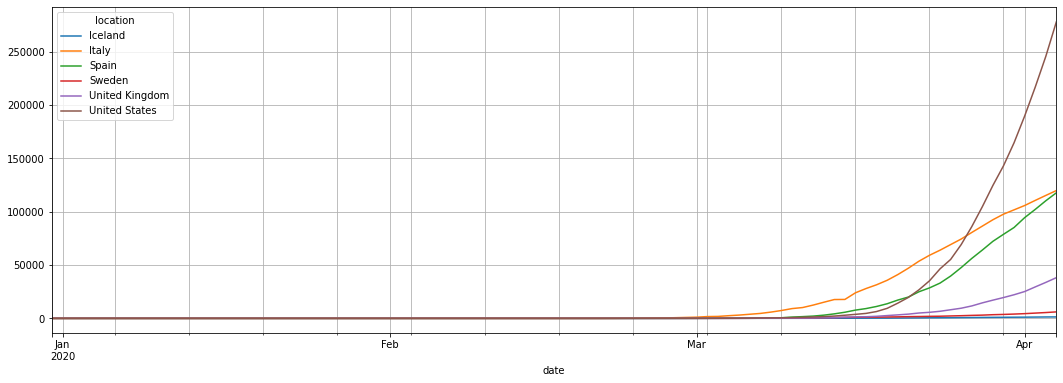

In [78]:
df.total_cases.unstack(0).plot()

## early days

AttributeError: module 'pandas' has no attribute 'split'

In [100]:
d = {}
for location in df.index.to_frame().location.unique():
    df_c = df.loc[location]
    indices_total_cases_above_thresh = (df_c.total_cases > 100).to_numpy().nonzero()[0]
    print(indices_total_cases_above_thresh)
    if len(indices_total_cases_above_thresh) == 0:
        continue
    df_c_shifted = df_c.shift((-1) * indices_total_cases_above_thresh[0])
    #print(df_c_shifted)
    d[location] = df_c_shifted
d    
#pd.DataFrame.from_dict(d)
#out = pd.DataFrame.from_dict({location : s.shift((-1) * (s > 1000).to_numpy().nonzero()[0][0])  for location, s in dict((df.total_cases.unstack(0))).items()})
#out.plot(lo)

[73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
[55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
[63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86
 87 88 89 90 91 92 93 94 95]
[67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94 95]
[66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 91 92 93 94 95]
[63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86
 87 88 89 90 91 92 93 94 95]


{'Iceland':             new_cases  new_deaths  total_cases  total_deaths
 date                                                        
 2019-12-31       32.0         0.0        117.0           0.0
 2020-01-01        0.0         0.0        117.0           0.0
 2020-01-02       21.0         0.0        138.0           0.0
 2020-01-03       40.0         0.0        178.0           0.0
 2020-01-04       21.0         0.0        199.0           0.0
 ...               ...         ...          ...           ...
 2020-03-31        NaN         NaN          NaN           NaN
 2020-04-01        NaN         NaN          NaN           NaN
 2020-04-02        NaN         NaN          NaN           NaN
 2020-04-03        NaN         NaN          NaN           NaN
 2020-04-04        NaN         NaN          NaN           NaN
 
 [96 rows x 4 columns],
 'Italy':             new_cases  new_deaths  total_cases  total_deaths
 date                                                        
 2019-12-31       53.0  

# plot confirmed per million for varioues countries

In [3]:
path_data2 = Path('../../our_world_in_data_covid_19.git/public/data/ecdc/')

In [4]:
df = pd.read_csv(path_data2.joinpath('total_cases_per_million.csv'), index_col=0, parse_dates=True)

In [5]:
percentage_total_cases_of_population = (10 ** -4 * df.iloc[-1])

In [6]:
percentage_total_cases_of_population.plot.bar()

In [14]:
'Wuhan' in df.columns

False

NameError: name 'countries' is not defined

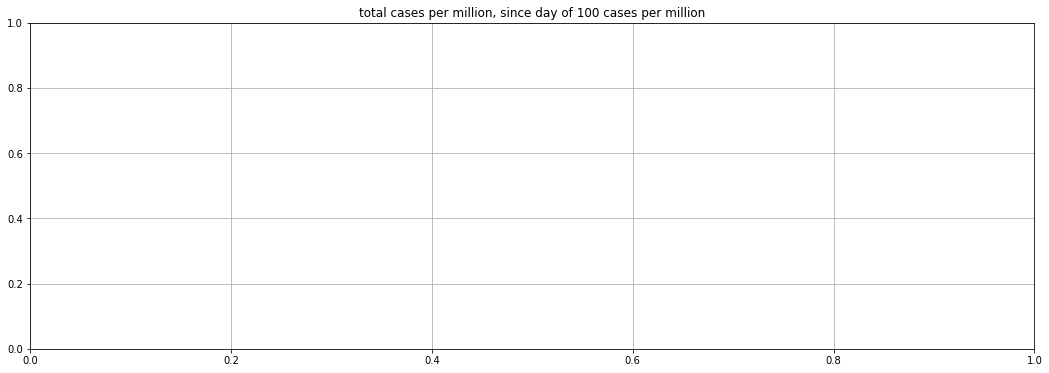

In [7]:
fig, ax = plt.subplots()
ax.set_title('total cases per million, since day of 100 cases per million')
thresh = 100
for c in countries:
    df[c].shift(-df[c].searchsorted(thresh)).plot(ax=ax, label=c)

ax.legend(loc='best')

In [45]:
pd.where(df.max() > 5000)

AttributeError: module 'pandas' has no attribute 'where'

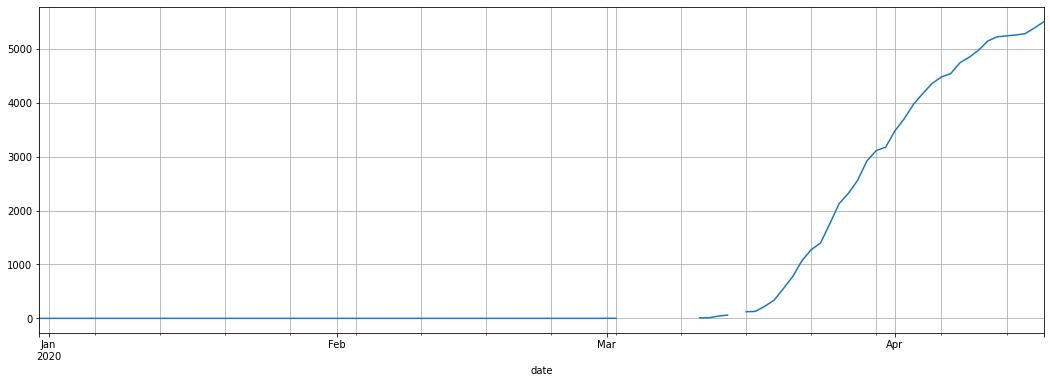

In [57]:
df.Luxembourg.plot()

In [49]:
df.columns[df.max() > 5000]

Index(['Andorra', 'Iceland', 'Luxembourg', 'San Marino', 'Vatican'], dtype='object')

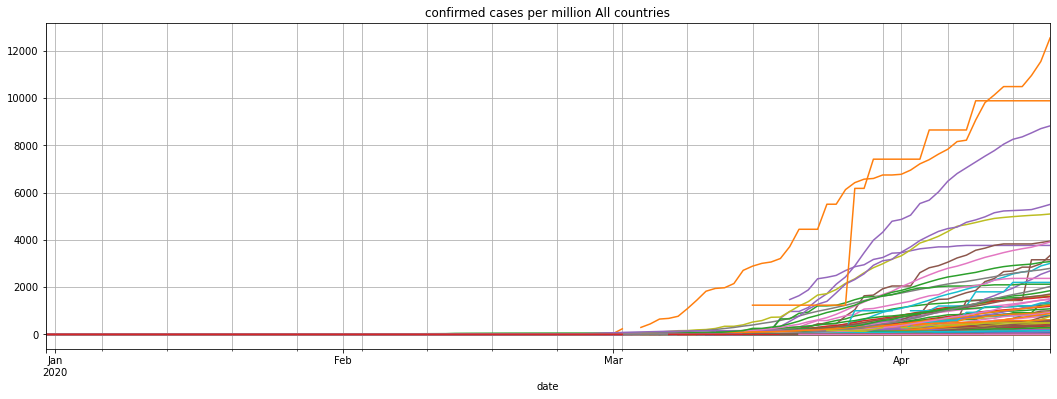

In [55]:
df.plot(legend=False, title='confirmed cases per million All countries')

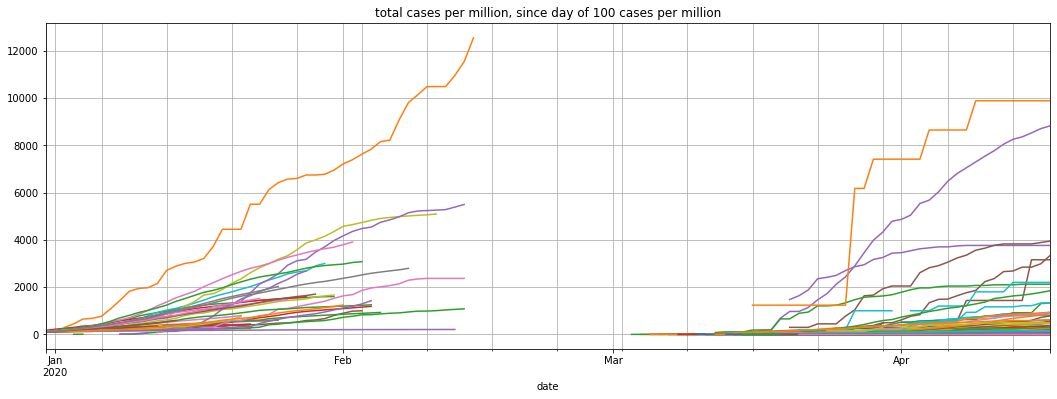

In [52]:
fig, ax = plt.subplots()
ax.set_title('total cases per million, since day of 100 cases per million')
thresh = 100
for c in df.columns:
    df[c].shift(-df[c].searchsorted(thresh, side='right')).plot(ax=ax, label=c)



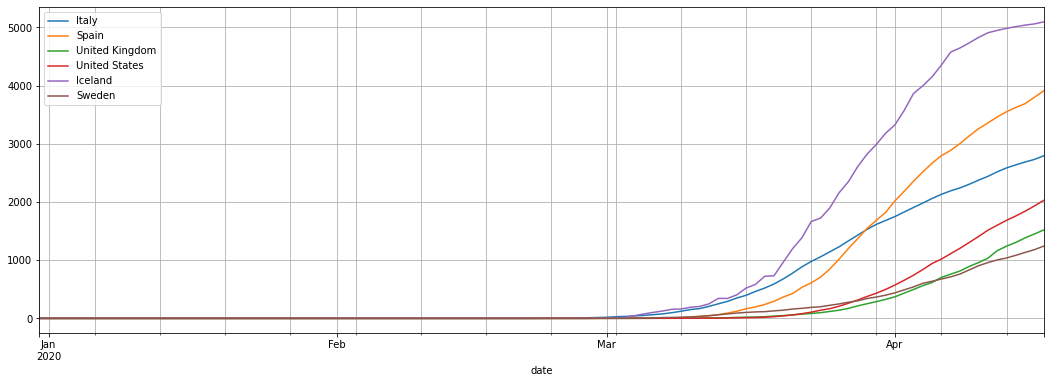

In [10]:
countries = ['Italy', 'Spain', 'United Kingdom', 'United States', 'Iceland', 'Sweden']
df[countries].plot()

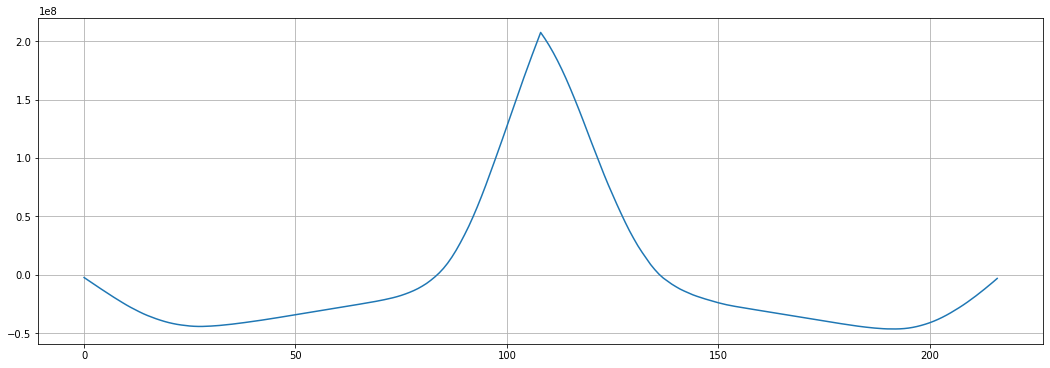

In [30]:
pd.Series(np.correlate(df.Spain.values - df.Spain.mean(), df.Iceland.values - df.Iceland.mean(), 'full')).plot()

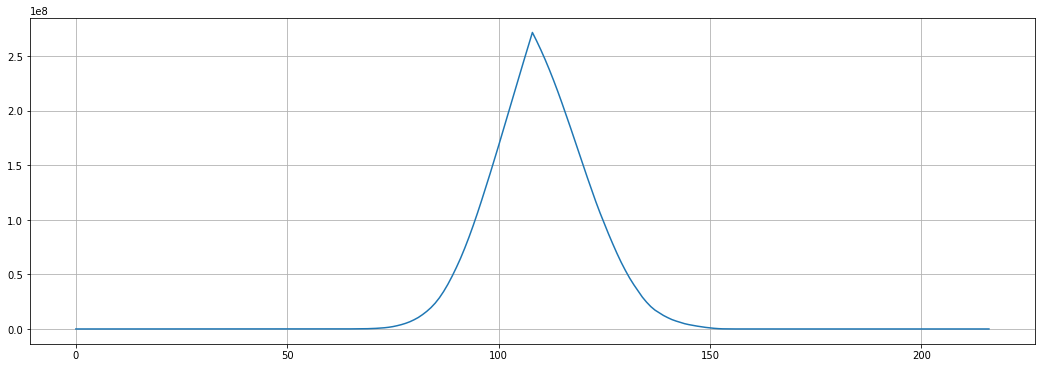

In [25]:
pd.Series(np.correlate(df.Spain.values, np.exp(np.ones(10) * )).plot()

In [28]:
fig, ax = plt.subplots()
df.Iceland.plot()
df.Spain.shift(-5).plot()

## active cases by summing new cases over period (per million)

In [7]:
population = pd.read_csv(path_data.joinpath('demographycs/population_by_country_2020.csv'), skiprows=[0,], index_col=0, usecols=[0, 1], squeeze=True)

In [8]:
active_duration = 14
df2 = pd.read_csv(path_data2.joinpath('new_cases_per_million.csv'), index_col=0, parse_dates=True)
active = (df2['2020/02/15':]).rolling(active_duration, axis=0).sum()

In [9]:
df2.Luxembourg.rolling(14).sum().plot()

In [10]:
lux = pd.read_csv(path_data.joinpath('luxembourg_active_cases.csv'), skiprows=[0,], index_col=0, usecols=[0, 1], squeeze=True, parse_dates=True) / population['Luxembourg'] * 1e6

In [11]:
active['Luxembourg'] = lux

In [16]:
active['Luxembourg'].plot()

## Active cases by time: the propagation of the epidemic, and total infected: many countries, countries at peak, countries without lockdown or late lockdown

## all countries population > thresh

In [12]:
real_country_min_size = 1e5
real_countries = population.index[population > real_country_min_size]

In [13]:
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['font.size'] = 14

In [14]:
import matplotlib.ticker as mtick
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [15]:
countries3 = set(df2.columns).intersection(set(real_countries))
countries4 = ['Belgium', 'Spain', 'France', 'Iceland', 'United States', 'United Kingdom', 'Italy', 'Austria', 'Netherlands', 'Sweden', 'Germany', 'Denmark', 'Finland', 'Czech Republic', 'New Zealand', 'Australia']
countries5 = ['Iceland', 'Sweden', 'Finland', 'Germany', 'Netherlands']

countries4 = countries5 + list(set(countries4) - set(countries5))
countries3 = countries4 + list(set(countries3) - set(countries4))

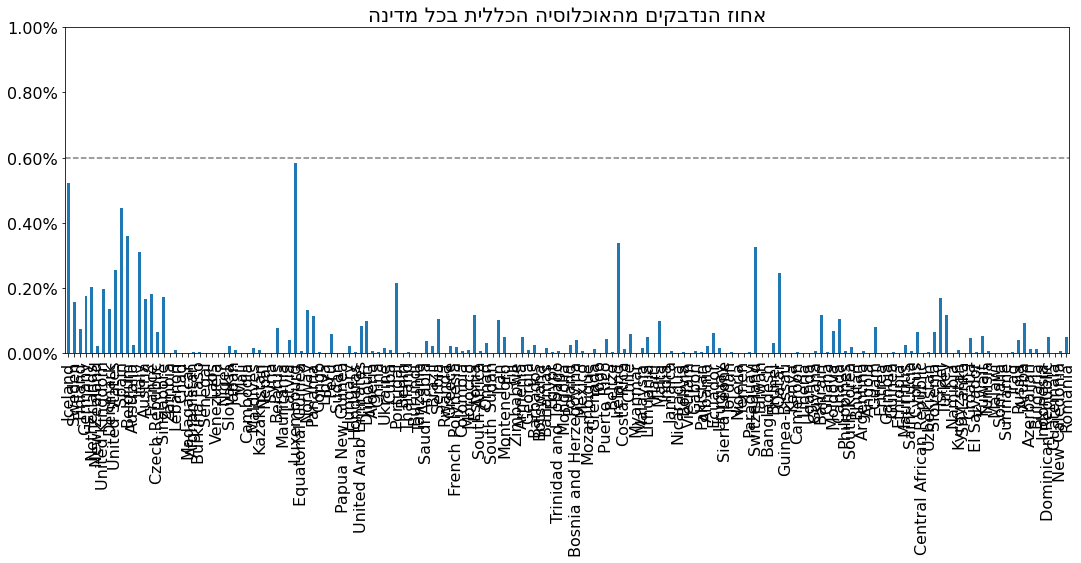

In [16]:
#df2[set(df2.columns).intersection(set(real_countries))]
def plot_active_cases(df2, percentage_total_cases_of_population, countries, active_duration=14, rot_bar=45, is_luxemburg_manual=False):
    fig, ax = plt.subplots()
    df2[countries].plot(ax=ax, grid=False, figsize=(6, 9), title='חולים* למיליון תושבים בכל יום ומדינה'[::-1], legend=False)
    #if is_luxemburg_manual:
    #    lux.plot(ax=ax)
    ax.set_ylabel('חולים למיליון תושבים'[::-1])
    ax.set_ylim(0, 1e4)
    ax.set_xlabel('')
    ax.grid(False, which='both')
    #ax.xaxis.set_major_locator(matplotlib.dates.WeekLocator())
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    _ = ax.axhline(6000, linestyle='--', color='grey')#, label=' מהאוכלוסיה'[::-1] + '0.5%'  )
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    #ax.text(0.05, 0.67, '0007 חולים למיליון תושבים'[::-1], transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    #ax.text(0.05, 0.95, '*)שלא החלימו או מתו('[::-1], transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

    #rint(_)
    #ax.legend([handle,], [handle._label,], loc='center')
    fig2, ax2 = plt.subplots()
    percentage_total_cases_of_population[countries].plot.bar(ax=ax2, rot=rot_bar, title='אחוז הנדבקים מהאוכלוסיה הכללית בכל מדינה'[::-1])
    ax2.set_ylim(0, 1)
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    #ax2.set_ylabel('אחוז הנדבקים מהאוכלוסיה הכללית'[::-1])
    ax2.grid(False, which='both')

    _ = ax2.axhline(0.6, linestyle='--', color='grey')#, label=' מהאוכלוסיה'[::-1] + '0.5%'  )

    return (fig, ax), (fig2, ax2)

#countries3.remove('Luxembourg')
(fig, ax) , (fig2, ax2) = plot_active_cases(active, percentage_total_cases_of_population, countries3, rot_bar=90, is_luxemburg_manual=True)
#fig.suptitle('מדינות מעל מאה אלף תושבים'[::-1])
#fig2.suptitle('מדינות מעל מאה אלף תושבים'[::-1])

In [479]:
ax.xaxis.get_major_formatter().__dict__

{'format': None,
 'freq': 6000,
 'locs': array([18307, 18322, 18353, 18369]),
 'formatdict': {18307: b'',
  18322: b'\n\n%b\n%Y',
  18353: b'\n\n%b',
  18369: b''},
 'isminor': False,
 'isdynamic': True,
 'offset': 0,
 'plot_obj': <matplotlib.axes._subplots.AxesSubplot at 0x7f13864f5198>,
 'finder': <function pandas.plotting._matplotlib.converter._daily_finder(vmin, vmax, freq)>,
 'axis': <matplotlib.axis.XAxis at 0x7f13864f52e8>}

In [476]:
list(ax.get_xticklabels())

[Text(18307, 0, ''),
 Text(18322, 0, '\n\nMar\n2020'),
 Text(18353, 0, '\n\nApr'),
 Text(18369, 0, '')]

In [ ]:
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))

## countries that have peaked

Text(0.5, 1.0, 'וירחא וא הפיגמה אישב תונידמב תיללכה הייסולכואה ךותמ םירקמה זוחא')

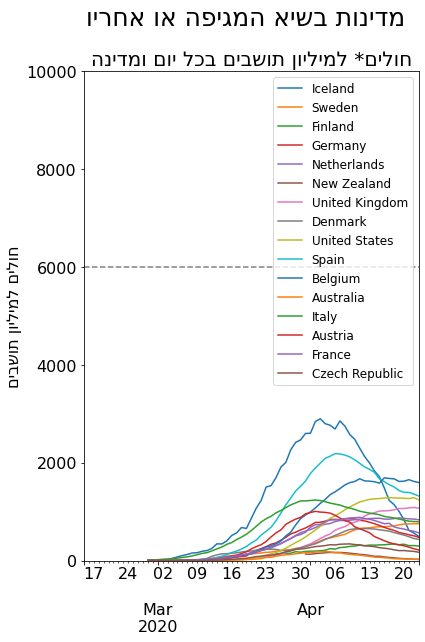

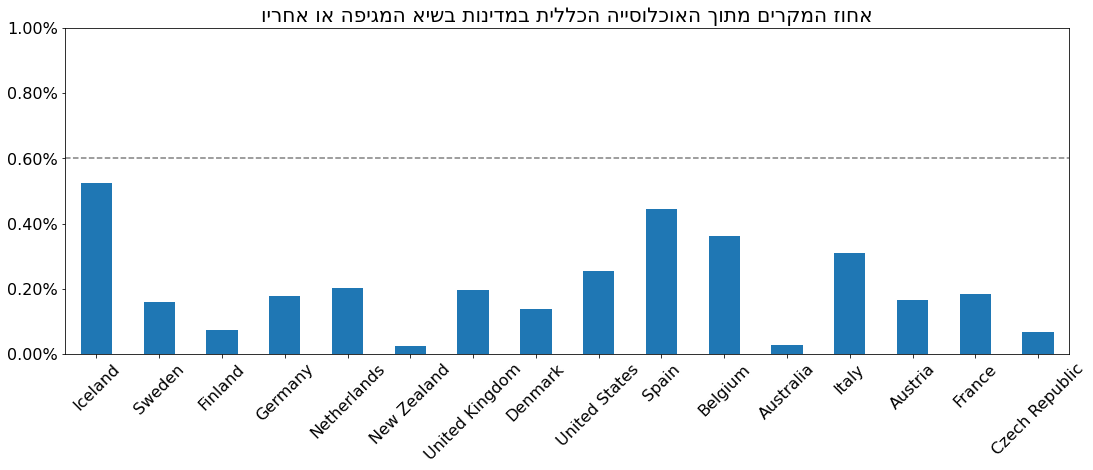

In [17]:
(fig, ax) , (fig2, ax2) = plot_active_cases(active, percentage_total_cases_of_population, countries4)
fig.suptitle('מדינות בשיא המגיפה או אחריו'[::-1], fontsize=25)
#fig2.suptitle('דוגמאות למדינות שעברו את השיא'[::-1])
ax.legend(loc='best', prop={'size' : 12})
#ax.set_title('*חולים למיליון תושבים בכל יום, מדינות אחרי השיא'[::-1])
ax2.set_title('אחוז המקרים מתוך האוכלוסייה הכללית במדינות בשיא המגיפה או אחריו'[::-1])

### detour: compare the precdictions of MOH to data regarding total cases in population

In [67]:
path_results = Path('../analysis_results/gartner_predictions')

In [69]:
table_1 = pd.read_csv(path_results.joinpath('prediction_1.csv'), index_col=[0, 1])
table_2 = pd.read_csv(path_results.joinpath('prediction_2.csv'), index_col=[0, 1])
table_summary_3 = pd.read_csv(path_data.joinpath('epidemic_models/gartner_summary_table_demarker_from_source.csv'), index_col=0, skiprows=[0, ], usecols=list(range(9)))

In [126]:
table_2

exposed_ratio  exposed  symptomatic  \
r    proportion_detected                                        
1.20 0.3                           0.24  2190767       657230   
     0.5                           0.25  2254000      1127000   
     0.7                           0.26  2334571      1634200   
1.35 0.3                           0.41  3731690      1119507   
     0.5                           0.42  3749548      1874774   
     0.7                           0.43  3849936      2694955   
1.50 0.3                           0.54  4829723      1448917   
     0.5                           0.54  4904444      2452222   
     0.7                           0.55  4966490      3476543   
1.70 0.3                           0.66  5899090      1769727   
     0.5                           0.66  5961574      2980787   
     0.7                           0.67  6022879      4216015   
2.00 0.3                           0.78  7031167      2109350   
     0.5                           0.79  7082878      3541439   
     0.7                           0.79  7121179      4984825   

                          moderate_severe  respirator   dead  days_to_peak  \
r    proportion_detected                                                     
1.20 0.3                            43927       15312   6118           127   
     0.5                            74658       25991  10426           148   
     0.7                           109990       38461  15405           162   
1.35 0.3                            73910       25882  10417           113   
     0.5                           125230       43625  17287           120   
     0.7                           181644       63186  25358           127   
1.50 0.3                            97374       33999  13560            99   
     0.5                           161137       56433  22658           106   
     0.7                           233751       81106  32770           113   
1.70 0.3                           118924       41463  16595            92   
     0.5                           197510       68932  27733            99   
     0.7                           284417      100106  39732            99   
2.00 0.3                           140238       49220  19701            85   
     0.5                           232555       80652  32650            85   
     0.7                           333955      117034  46974            92   

                          days_to_finish  
r    proportion_detected                  
1.20 0.3                             254  
     0.5                             296  
     0.7                             324  
1.35 0.3                             226  
     0.5                             240  
     0.7                             254  
1.50 0.3                             198  
     0.5                             212  
     0.7                             226  
1.70 0.3                             184  
     0.5                             198  
     0.7                             198  
2.00 0.3                             170  
     0.5                             170  
     0.7                             184

In [111]:
#['תחזית א5'[::-1], 'תחזית א4'[::-1], 'תחזית א3'[::-1], 'תחזית א2'[::-1], 'תחזית א1'[::-1]]    

['5א תיזחת', '4א תיזחת', '3א תיזחת', '2א תיזחת', '1א תיזחת']

In [129]:
#AA = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', ]
AA = table_1.index.to_frame().values.tolist() + table_1.index.to_frame().values.tolist()
BB = table_1.exposed_ratio.values.tolist

[[1.2, 'average'],
 [1.2, 'max'],
 [1.2, 'min'],
 [1.35, 'average'],
 [1.35, 'max'],
 [1.35, 'min'],
 [1.5, 'average'],
 [1.5, 'max'],
 [1.5, 'min'],
 [1.7, 'average'],
 [1.7, 'max'],
 [1.7, 'min'],
 [2.0, 'average'],
 [2.0, 'max'],
 [2.0, 'min']]

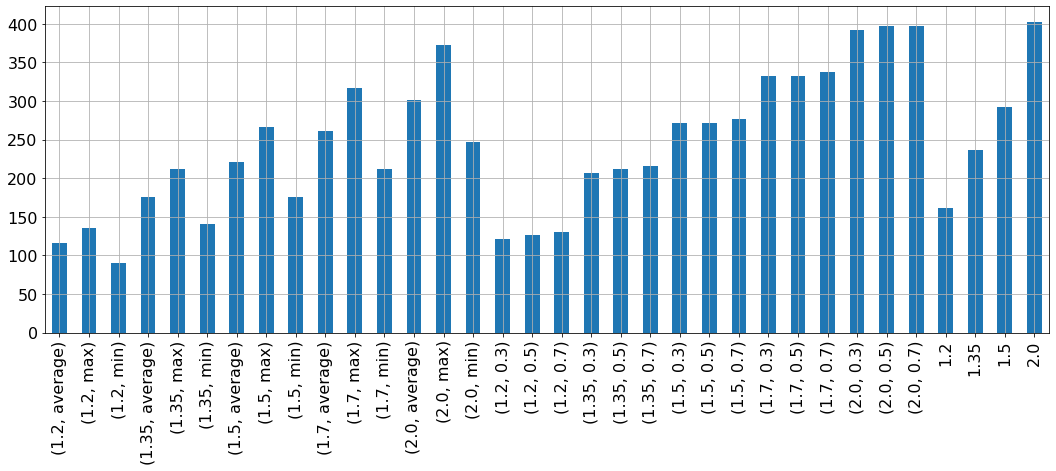

In [70]:
(pd.concat([table_1.exposed_ratio, table_2.exposed_ratio, table_summary_3.exposed_ratio]) / (0.01 * percentage_total_cases_of_population[countries4]).mean()).plot.bar()

In [71]:
(pd.concat([table_1.exposed_ratio, table_2.exposed_ratio, table_summary_3.exposed_ratio]) / (0.01 * percentage_total_cases_of_population[countries4]).max()).plot.bar()

In [163]:
percentage_total_cases_of_population_MOH = 100 * table_1.exposed_ratio.groupby('r').mean().loc[[1.2, 1.5, 2]]
#percentage_total_cases_of_population_MOH.plot.bar()

percentage_total_cases_of_population_MOH = pd.Series(index=AA, data=[23, 35, 44, 52, 61] + [25, 42, 54, 66, 79])
percentage_total_cases_of_population_MOH.plot.bar()

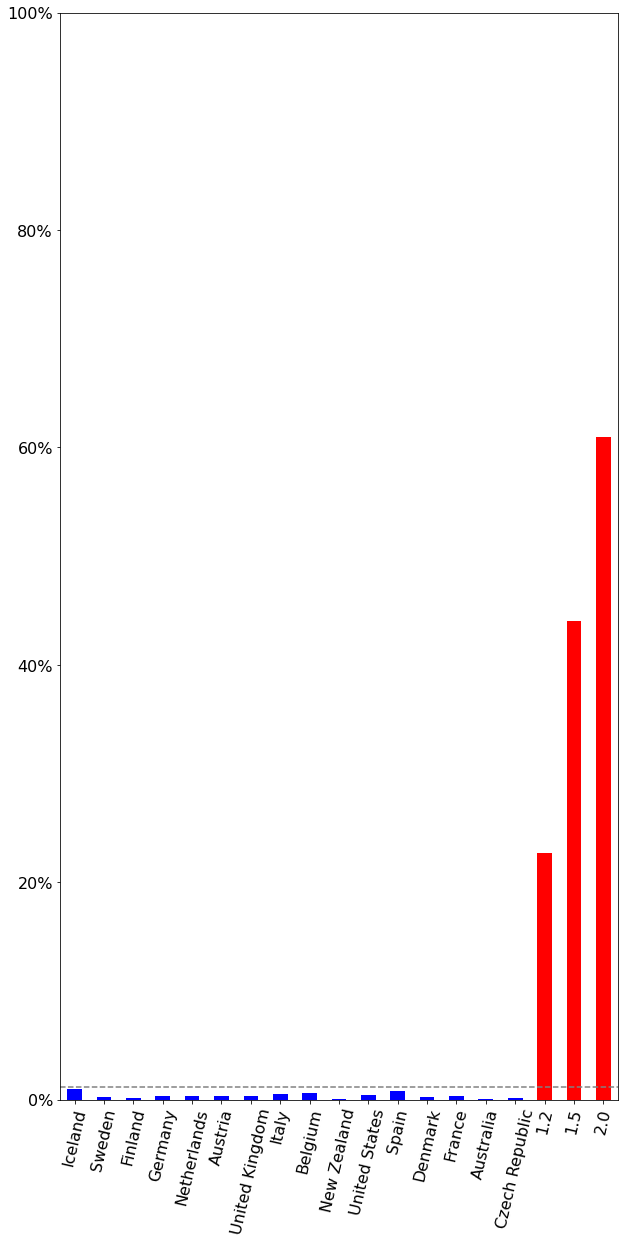

In [164]:
fig2, ax2 = plt.subplots(figsize=(10, 20))
pd.concat([2 * percentage_total_cases_of_population[countries4], percentage_total_cases_of_population_MOH]).plot.bar(ax=ax2, rot=77, color=['blue',] * len(countries4) + ['red',] * len(percentage_total_cases_of_population_MOH))
ax2.set_ylim(0, 100)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax2.set_ylabel('אחוז הנדבקים מהאוכלוסיה הכללית'[::-1])
ax2.grid(False, which='both')

_ = ax2.axhline(2 * 0.6, linestyle='--', color='grey')#, label=' מהאוכלוסיה'[::-1] + '0.5%'  )

#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax2.text(0.55, 0.95, 'תחזיות משרד הבריאות'[::-1], transform=ax2.transAxes, fontsize=25, verticalalignment='top', bbox=props, color='red')
#ax2.text(0.15, 0.95, 'מידע עדכני'[::-1], transform=ax2.transAxes, fontsize=25, verticalalignment='top', bbox=props, color='blue')


fig2.savefig(Path.home().joinpath('Downloads/compare_total_percentage_infected_A.jpeg'))

In [165]:
percentage_total_cases_of_population_MOH = 100 * table_2.exposed_ratio.groupby('r').mean().loc[[1.2, 1.5, 2]]
#percentage_total_cases_of_population_MOH.plot.bar()

percentage_total_cases_of_population_MOH = pd.Series(index=AA, data=[23, 35, 44, 52, 61] + [25, 42, 54, 66, 79])
percentage_total_cases_of_population_MOH.plot.bar()

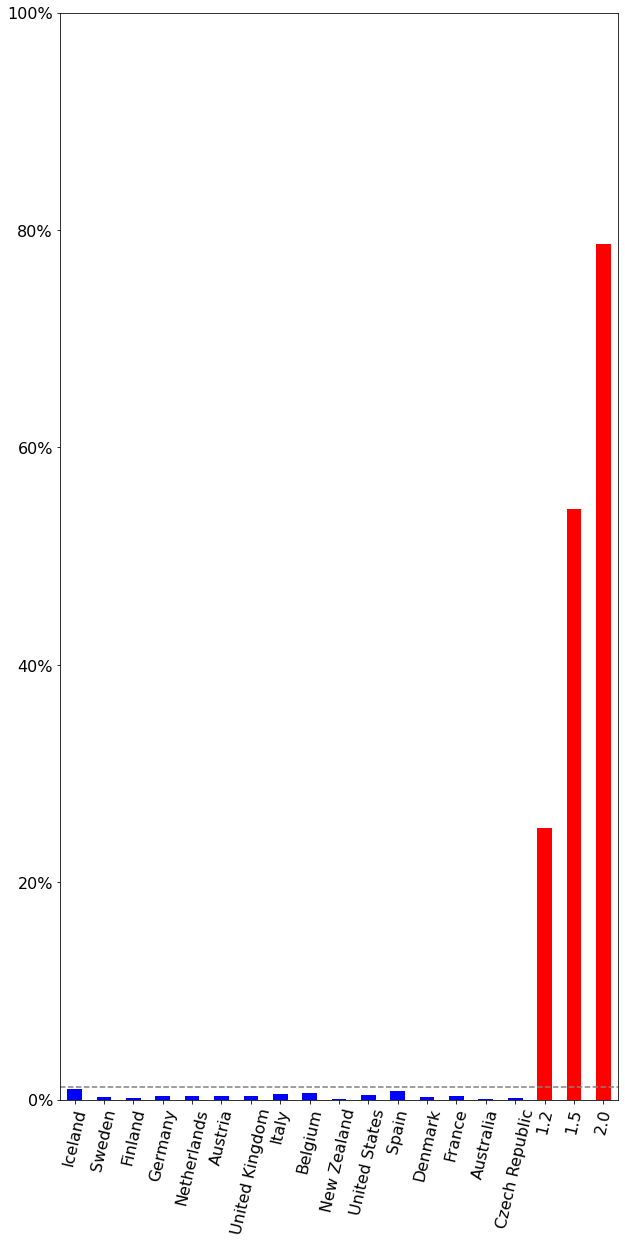

In [166]:
fig2, ax2 = plt.subplots(figsize=(10, 20))
pd.concat([2 * percentage_total_cases_of_population[countries4], percentage_total_cases_of_population_MOH]).plot.bar(ax=ax2, rot=77, color=['blue',] * len(countries4) + ['red',] * len(percentage_total_cases_of_population_MOH))
ax2.set_ylim(0, 100)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax2.set_ylabel('אחוז הנדבקים מהאוכלוסיה הכללית'[::-1])
ax2.grid(False, which='both')

_ = ax2.axhline(2 * 0.6, linestyle='--', color='grey')#, label=' מהאוכלוסיה'[::-1] + '0.5%'  )

#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax2.text(0.55, 0.95, 'תחזיות משרד הבריאות'[::-1], transform=ax2.transAxes, fontsize=25, verticalalignment='top', bbox=props, color='red')
#ax2.text(0.15, 0.95, 'מידע עדכני'[::-1], transform=ax2.transAxes, fontsize=25, verticalalignment='top', bbox=props, color='blue')


fig2.savefig(Path.home().joinpath('Downloads/compare_total_percentage_infected_B.jpeg'))

In [371]:
list(ax2.xaxis.get_ticklabels())[0]._text

'Belgium'

## low or non lockdown

In [105]:
len(countries5), len(countries4), len(countries3)

(5, 16, 167)

In [104]:
df2.columns

Index(['World', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'United States', 'United States Virgin Islands', 'Uruguay',
       'Uzbekistan', 'Vatican', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=207)

Text(0.5, 1.0, 'רחואמ רגס םע וא רגס אלל תונידמב תיללכה הייסולכואה ךותמ םירקמה זוחא')

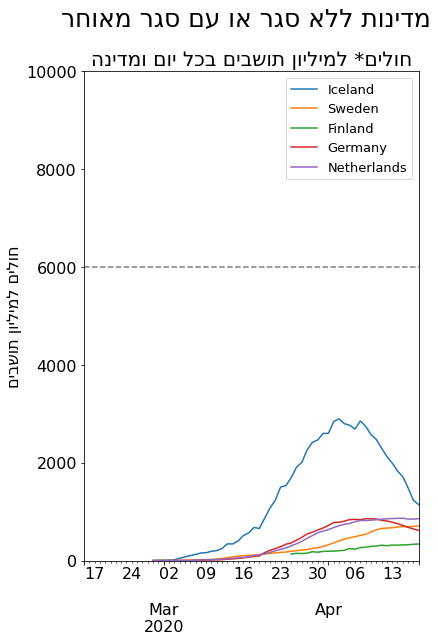

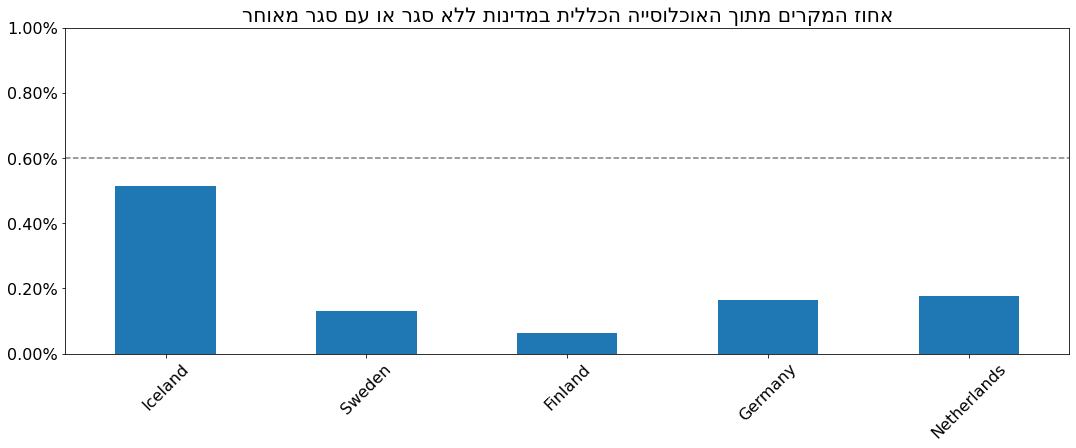

In [110]:
(fig, ax), (fig2, ax2) = plot_active_cases(active, percentage_total_cases_of_population, countries5)
fig.suptitle('מדינות ללא סגר או עם סגר מאוחר'[::-1], fontsize=25)
#fig2.suptitle('מדינות *ללא* סגר או עם סגר *מאוחר*'[::-1])
ax.legend(loc='best', prop={'size' : 13})
ax2.set_title('אחוז המקרים מתוך האוכלוסייה הכללית במדינות ללא סגר או עם סגר מאוחר'[::-1])

## lockdown time, start time, peak time

In [72]:
lockdown = pd.read_csv(path_data.joinpath('lockdown/lockdown_dates.csv'), skiprows=[0,], index_col=[0, 1], parse_dates=['Start date', 'End date'], infer_datetime_format=True)
lockdown

Start date   End date     Level  \
Country              Place                                          
China                Xiangyang    2020-01-28 2020-03-25      City   
Philippines          Soccsksargen 2020-03-23 2020-04-30    Region   
China                Huangshi     2020-01-24 2020-03-13      City   
Thailand             NaN          2020-03-25 2020-04-30  National   
China                Jingzhou     2020-01-24 2020-03-17      City   
...                                      ...        ...       ...   
United States        New Jersey   2020-03-21 2020-05-15     State   
                     Montana      2020-03-28 2020-04-24     State   
United Arab Emirates NaN          2020-03-22 2020-04-24  National   
United States        New York     2020-03-22 2020-05-15     State   
                     Vermont      2020-03-25 2020-05-15     State   

                                                                                 url  \
Country              Place                                                             
China                Xiangyang     https://www.thepaper.cn/newsDetail_forward_567...   
Philippines          Soccsksargen  https://www.philstar.com/headlines/2020/03/12/...   
China                Huangshi      https://news.sina.com.cn/c/2020-03-13/doc-iimx...   
Thailand             NaN           https://www.fuw.ch/article/bundesrat-ruft-den-...   
China                Jingzhou              https://www.yicai.com/news/100550418.html   
...                                                                              ...   
United States        New Jersey    https://en.as.com/en/2020/04/16/other_sports/1...   
                     Montana       https://www.dailymail.co.uk/news/article-82257...   
United Arab Emirates NaN           https://www.thenational.ae/uae/transport/coron...   
United States        New York                         https://twitter.com/NYGovCuomo   
                     Vermont       https://en.as.com/en/2020/04/16/other_sports/1...   

                                       update  Confirmed  
Country              Place                                
China                Xiangyang     2020-02-04       True  
Philippines          Soccsksargen  2020-03-12      False  
China                Huangshi      2020-03-14       True  
Thailand             NaN           2020-03-16      False  
China                Jingzhou      2020-03-16       True  
...                                       ...        ...  
United States        New Jersey    2020-04-17      False  
                     Montana       2020-04-17      False  
United Arab Emirates NaN           2020-04-17      False  
United States        New York      2020-04-17      False  
                     Vermont       2020-04-17      False  

[176 rows x 6 columns]

In [73]:
pd.Series(index=lockdown.index.to_frame().Country, data=lockdown['Start date'].values).where(lockdown.Level == 'National').dropna()

NotImplementedError: Index._join_level on non-unique index is not implemented

lockdown[lockdown.Level == 'National'].dropna().['Start date']

In [74]:
lockdown_national_level = lockdown[lockdown.Level == 'National'].dropna()
lockdown_national_level.index = lockdown_national_level.index.to_frame(index=False).Country.values
time_lockdown = lockdown_national_level['Start date']

## when it started in each country (cases more than 1 per million)

In [75]:
ecdc_full = pd.read_csv(path_data2.joinpath('COVID-2019 - ECDC (2020).csv'), index_col=[0, 1], parse_dates=True)

In [76]:
ecdc_full['Daily new confirmed cases of COVID-19']['Afghanistan']

Year
-21     0.0
-20     0.0
-19     0.0
-18     0.0
-17     0.0
       ... 
 87    10.0
 88    51.0
 89    63.0
 90    88.0
 91    35.0
Name: Daily new confirmed cases of COVID-19, Length: 113, dtype: float64

Year (day) 87 : 2020/04/17 # based on comparison to new cases afganistan

In [77]:

time_beginning = pd.Series({ country : pd.Timestamp('2020/04/17') - pd.Timedelta(ecdc_full['Days since the total confirmed cases of COVID-19 per million people reached 1'][country].loc[87], unit='days') for country in countries4})

## another option: not counting time, but counting exposed, or counting dead"


In [78]:
time_peak = pd.Series(index=countries4, data=active[countries4].dropna().index[active[countries4].dropna().values.argmax(axis=0).tolist()].values)

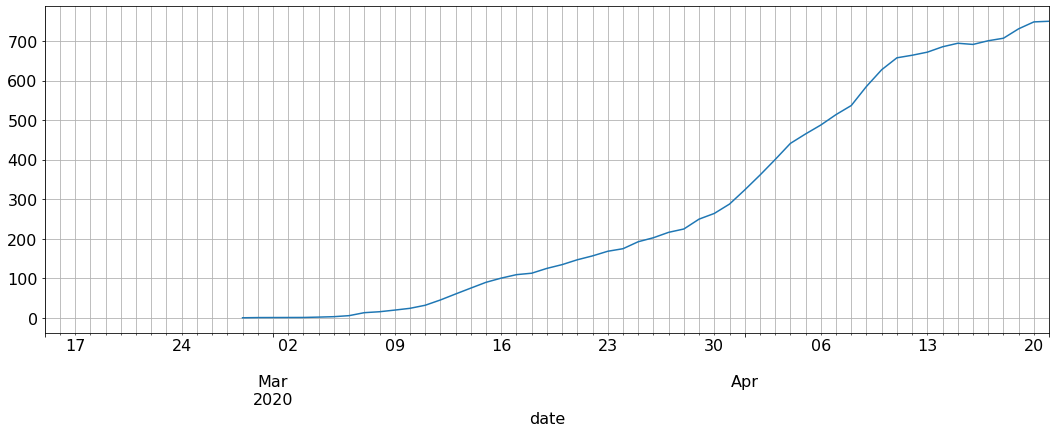

In [79]:
active.Sweden.plot()

In [80]:
time_peak

Iceland          2020-04-03
Sweden           2020-04-21
Finland          2020-04-18
Germany          2020-04-09
Netherlands      2020-04-19
United States    2020-04-17
Belgium          2020-04-16
Denmark          2020-04-12
Australia        2020-04-04
United Kingdom   2020-04-21
New Zealand      2020-04-06
Italy            2020-04-02
Spain            2020-04-06
France           2020-04-11
Czech Republic   2020-04-09
Austria          2020-04-02
dtype: datetime64[ns]

In [81]:
time_beginning_to_peak = (time_peak - time_beginning)

In [82]:
countries4_no_sweden_iceland = countries4.copy()
countries4_no_sweden_iceland.remove('Iceland')
countries4_no_sweden_iceland.remove('Sweden')

In [83]:
time_lockdown['Belgium']

Timestamp('2020-03-18 00:00:00')

In [84]:
pd.Series({ country : dict(time_lockdown).get(country) for country in countries4_no_sweden_iceland})

Finland          2020-03-27
Germany          2020-03-23
Netherlands      2020-03-16
United States           NaT
Belgium          2020-03-18
Denmark          2020-03-13
Australia        2020-03-23
United Kingdom   2020-03-24
New Zealand      2020-03-26
Italy            2020-03-09
Spain            2020-03-14
France           2020-03-17
Czech Republic   2020-03-16
Austria          2020-03-16
dtype: datetime64[ns]

In [85]:
time_peak - pd.Series({ country : dict(time_lockdown).get(country) for country in countries4_no_sweden_iceland})

Australia        12 days
Austria          17 days
Belgium          29 days
Czech Republic   24 days
Denmark          30 days
Finland          22 days
France           25 days
Germany          17 days
Iceland              NaT
Italy            24 days
Netherlands      34 days
New Zealand      11 days
Spain            23 days
Sweden               NaT
United Kingdom   28 days
United States        NaT
dtype: timedelta64[ns]

In [86]:
len(countries3)

168

In [87]:
time_beginning_to_peak

Iceland          34 days
Sweden           52 days
Finland          47 days
Germany          39 days
Netherlands      47 days
United States    41 days
Belgium          43 days
Denmark          39 days
Australia        34 days
United Kingdom   47 days
New Zealand      30 days
Italy            39 days
Spain            36 days
France           41 days
Czech Republic   34 days
Austria          32 days
dtype: timedelta64[ns]

In [88]:
time_lockdown['Netherlands']

Timestamp('2020-03-16 00:00:00')

In [89]:
DT = pd.concat([(time_lockdown[list(set(countries4_no_sweden_iceland).intersection(set(time_lockdown.index)))] - time_beginning).dt.days, time_beginning_to_peak.dt.days], keys=['t_lockdown', 't_peak'], axis=1)

In [90]:
DT = DT.dropna()

In [91]:
np.corrcoef(DT.t_lockdown.values, DT.t_peak.values)

array([[1.        , 0.15761381],
       [0.15761381, 1.        ]])

Text(0, 0.5, 'אישל הפיגמה תליחתמ םימי')

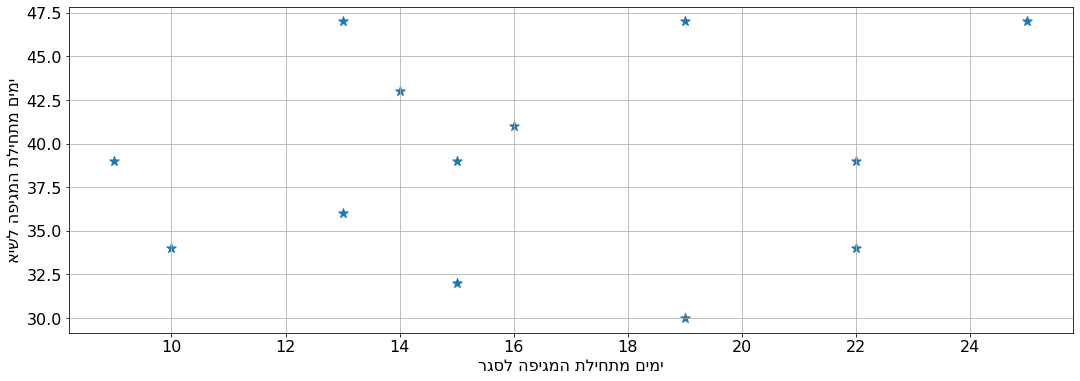

In [92]:
ax = DT.plot.scatter(x='t_lockdown', y='t_peak', marker='*', s=100)
ax.set_xlabel('ימים מתחילת המגיפה לסגר'[::-1])
ax.set_ylabel('ימים מתחילת המגיפה לשיא'[::-1])

## detour : compare MOH prediction regarding time to peak

days_to_peak_MOH = pd.Series(index=['תחזית 4'[::-1], 'תחזית 3'[::-1], 'תחזית 2'[::-1], 'תחזית 1'[::-1]], data=[440, 290, 220, 130])
days_to_peak_MOH.plot.bar()

In [93]:
(pd.concat([table_1.days_to_peak, table_2.days_to_peak, table_summary_3.days_to_peak]) / time_beginning_to_peak.dt.days.mean()).plot.bar()

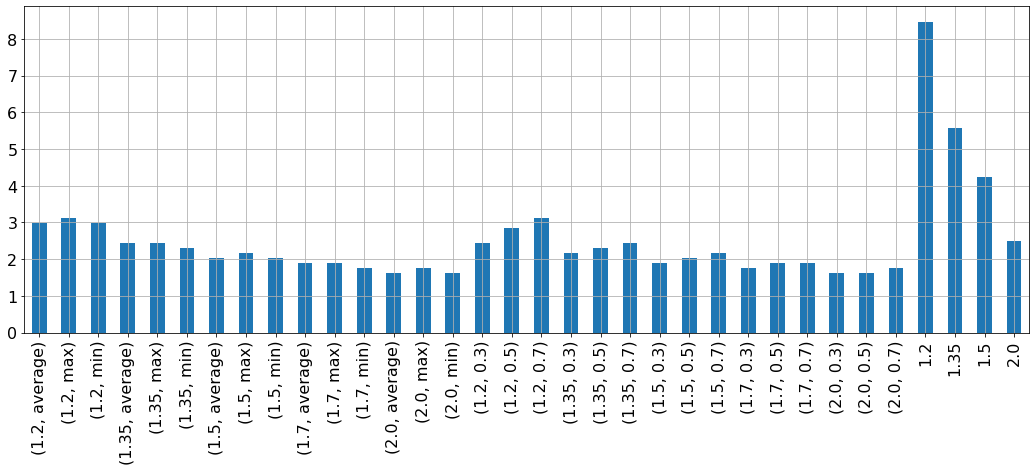

In [95]:
(pd.concat([table_1.days_to_peak, table_2.days_to_peak, table_summary_3.days_to_peak]) / time_beginning_to_peak.dt.days.max()).plot.bar()

In [114]:
#days_to_peak_MOH = table_1.days_to_peak.groupby('r').mean().loc[[1.2, 1.5, 2]]
days_to_peak_MOH = table_summary_3.days_to_peak.loc[[1.2, 1.5, 2]]

#days_to_peak_MOH.plot.bar()

In [115]:
#time_beginning_to_peak.dt.days.plot.bar(rot=77, yerr=7, capsize=4)

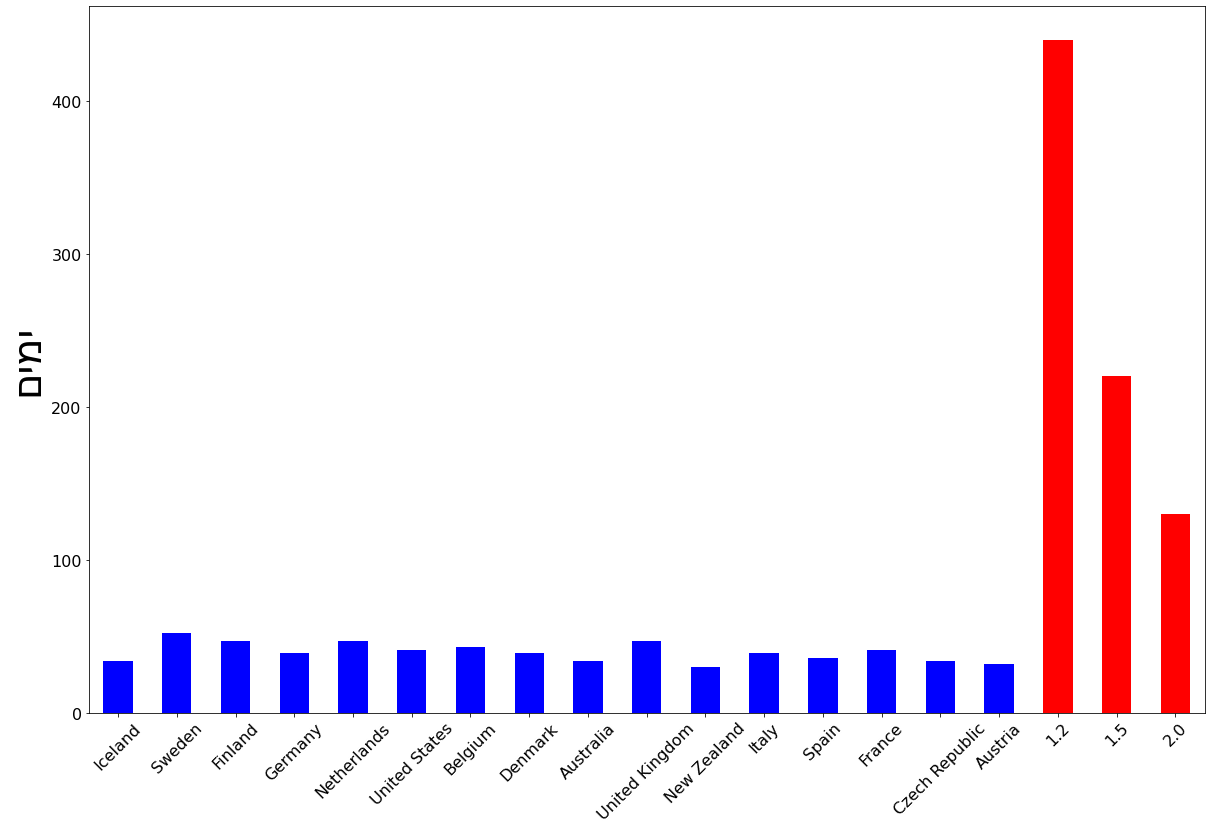

In [116]:
fig2, ax2 = plt.subplots(figsize=(20, 13))
pd.concat([time_beginning_to_peak.dt.days, days_to_peak_MOH]).plot.bar(ax=ax2, rot=45, color=['blue',] * len(time_peak) + ['red',] * len(days_to_peak_MOH))
#ax2.set_ylim(0, 100)
#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax2.set_ylabel('אחוז הנדבקים מהאוכלוסיה הכללית'[::-1])
ax2.grid(False, which='both')
ax2.set_ylabel('ימים'[::-1], fontsize=40)
#_ = ax2.axhline(2 * 0.6, linestyle='--', color='grey')#, label=' מהאוכלוסיה'[::-1] + '0.5%'  )

#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax2.text(0.55, 0.95, 'תחזיות משרד הבריאות'[::-1], transform=ax2.transAxes, fontsize=25, verticalalignment='top', bbox=props, color='red')
#ax2.text(0.15, 0.95, 'מידע עדכני'[::-1], transform=ax2.transAxes, fontsize=25, verticalalignment='top', bbox=props, color='blue')


fig2.savefig(Path.home().joinpath('Downloads/compare_time_to_peak.jpeg'))

### mortality

In [22]:
israel_normal_mortality = 5e4

In [23]:
mortality_per_1000 = pd.read_csv(path_data.joinpath('demographycs/mortality_per_1000.csv'), skiprows=[0,], index_col=0)
mortality_per_1000 = mortality_per_1000['CIA WF 2017']

In [24]:
corona_mortality = pd.read_csv(path_data.joinpath('demographycs/corona_mortality.csv'), skiprows=[0,], index_col=0)
corona_mortality_per_1000 = corona_mortality['Deaths per million'] / 1000
#https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Iceland
corona_mortality_per_1000['Iceland'] = 10 / 3.6e5 * 1000
corona_to_normal_mortality = corona_mortality_per_1000 / mortality_per_1000

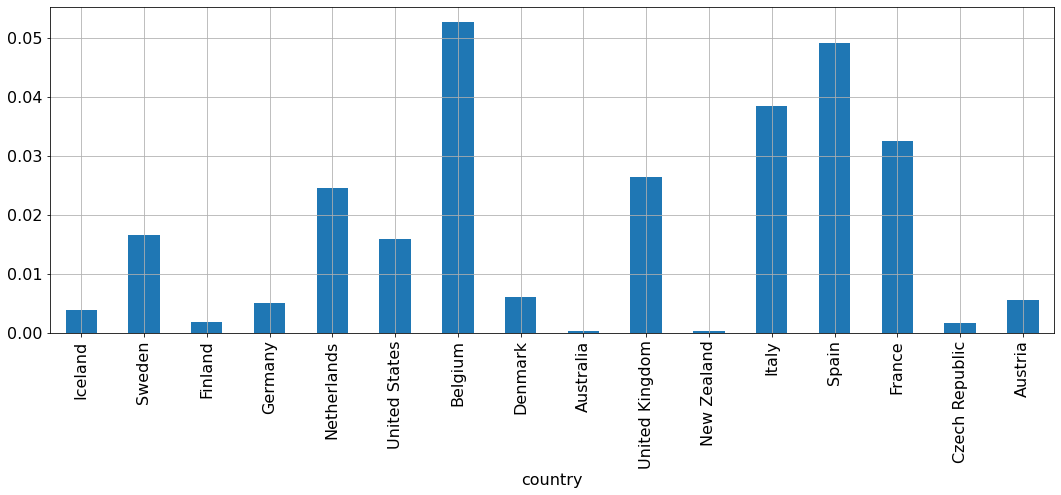

In [25]:
((corona_to_normal_mortality).loc[countries4]).plot.bar()

In [26]:
corona_to_normal_mortality.loc[countries4]

country
Iceland           0.003896
Sweden            0.016506
Finland           0.001776
Germany           0.005011
Netherlands       0.024460
United States     0.015863
Belgium           0.052602
Denmark           0.006096
Australia         0.000379
United Kingdom    0.026415
New Zealand       0.000364
Italy             0.038368
Spain             0.049042
France            0.032529
Czech Republic    0.001739
Austria           0.005534
dtype: float64

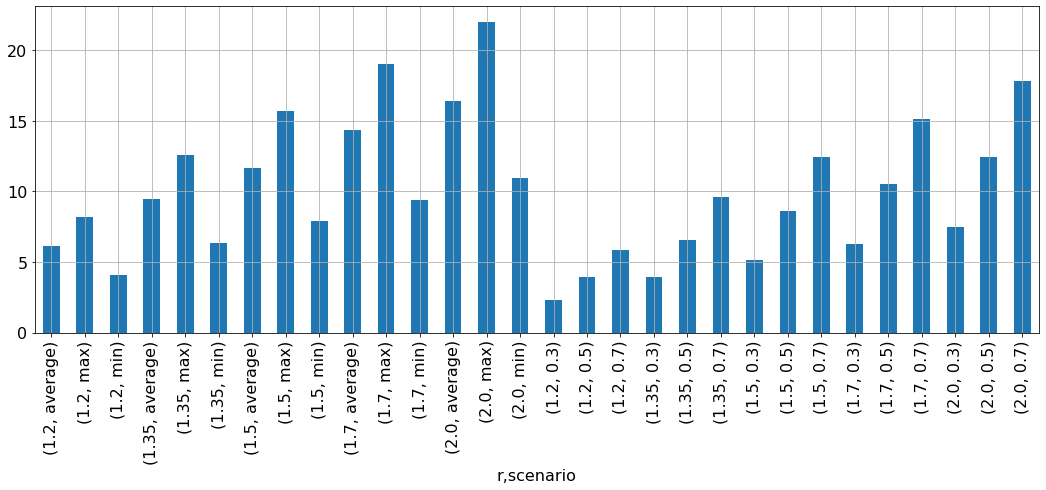

In [27]:
(pd.concat([table_1.dead, table_2.dead]) / israel_normal_mortality / corona_to_normal_mortality.loc[countries4].max()).plot.bar()

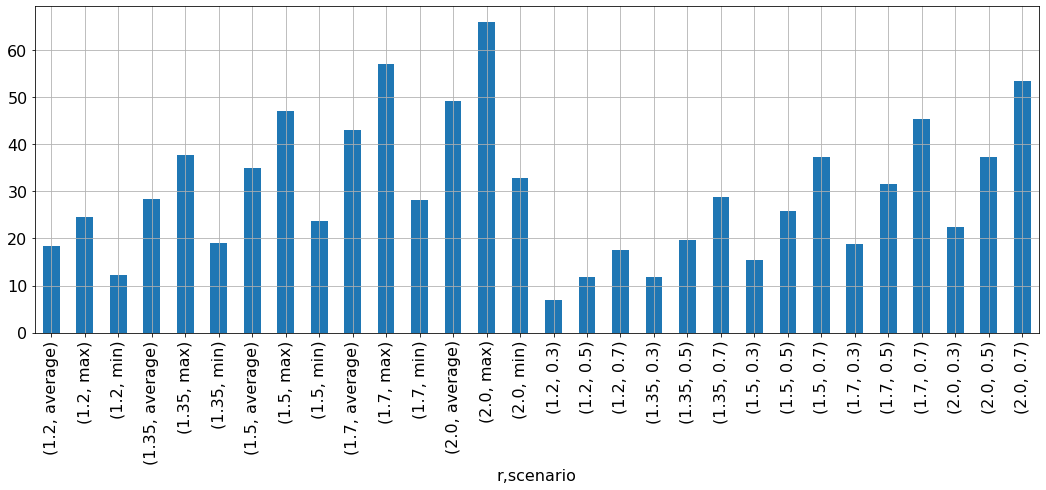

In [28]:
(pd.concat([table_1.dead, table_2.dead]) / israel_normal_mortality / corona_to_normal_mortality.loc[countries4].mean()).plot.bar()

In [268]:
(pd.concat([table_1.dead / table_1.symptomatic, table_2.dead / table_2.symptomatic]))

r     scenario
1.20  average     0.006045
      max         0.006045
      min         0.006045
1.35  average     0.006045
      max         0.006045
      min         0.006045
1.50  average     0.006045
      max         0.006045
      min         0.006045
1.70  average     0.006045
      max         0.006045
      min         0.006045
2.00  average     0.006045
      max         0.006045
      min         0.006045
1.20  0.3         0.009309
      0.5         0.009251
      0.7         0.009427
1.35  0.3         0.009305
      0.5         0.009221
      0.7         0.009409
1.50  0.3         0.009359
      0.5         0.009240
      0.7         0.009426
1.70  0.3         0.009377
      0.5         0.009304
      0.7         0.009424
2.00  0.3         0.009340
      0.5         0.009219
      0.7         0.009423
dtype: float64

In [31]:
corona_to_normal_mortality_MOH = table_1.dead / israel_normal_mortality
corona_to_normal_mortality_MOH = pd.Series(index=['תחזית משרד הבריאות'[::-1]], data=[corona_to_normal_mortality_MOH.mean()])

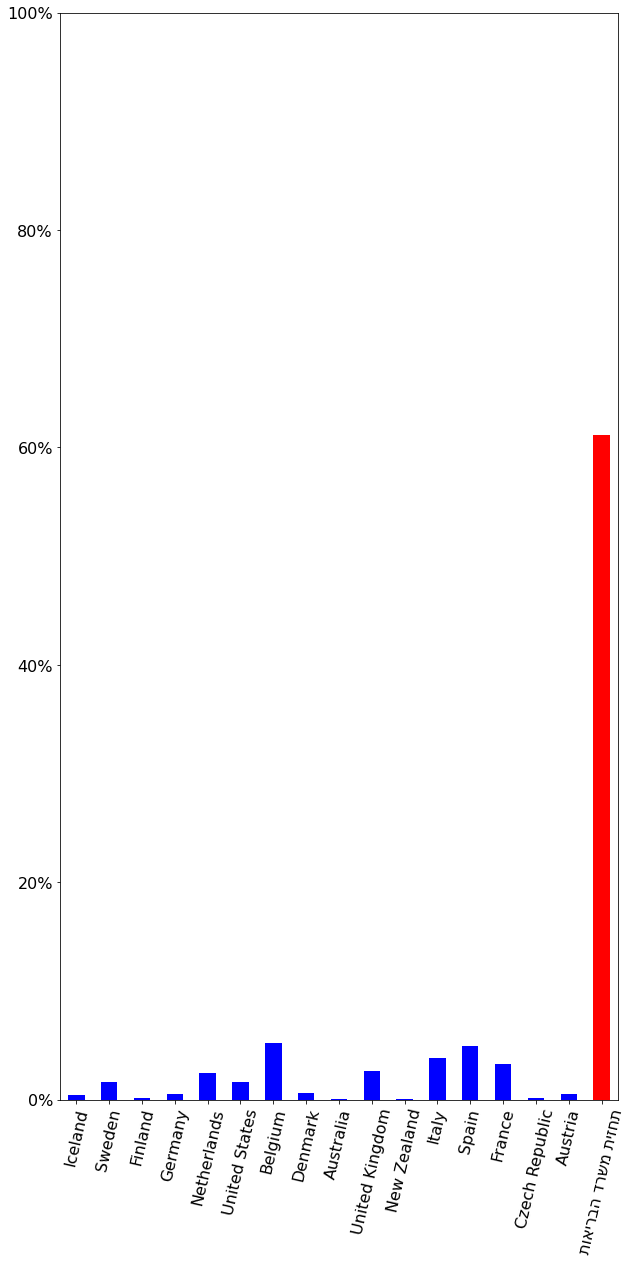

In [32]:
fig2, ax2 = plt.subplots(figsize=(10, 20))
(100 * pd.concat([corona_to_normal_mortality[countries4], corona_to_normal_mortality_MOH])).plot.bar(ax=ax2, rot=77, color=['blue',] * len(countries4) + ['red',] * len(corona_to_normal_mortality_MOH))
ax2.set_ylim(0, 100)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax2.set_ylabel('אחוז הנדבקים מהאוכלוסיה הכללית'[::-1])
ax2.grid(False, which='both')

#_ = ax2.axhline(2 * 0.6, linestyle='--', color='grey')#, label=' מהאוכלוסיה'[::-1] + '0.5%'  )

#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax2.text(0.55, 0.95, 'תחזיות משרד הבריאות'[::-1], transform=ax2.transAxes, fontsize=25, verticalalignment='top', bbox=props, color='red')
#ax2.text(0.15, 0.95, 'מידע עדכני'[::-1], transform=ax2.transAxes, fontsize=25, verticalalignment='top', bbox=props, color='blue')


fig2.savefig(Path.home().joinpath('Downloads/compare_corona_to_normal_mortality.jpeg'))

## estimating corona mortality in israel based on various countries

In [109]:
arbitrary_corona_mortality_underestimation = 2
corona_mortality_until_peak_from_all = 0.5 # this can be estimated from simulations!

In [113]:
(corona_to_normal_mortality[countries4] / corona_mortality_until_peak_from_all * arbitrary_corona_mortality_underestimation * israel_normal_mortality).median()


2195.8693191970933

Text(0.5, 1.0, 'Estimation of total corona mortality in Israel based on countries that has reached peak. \nTaking to account death after peak, and also assuming under reporting of corona death')

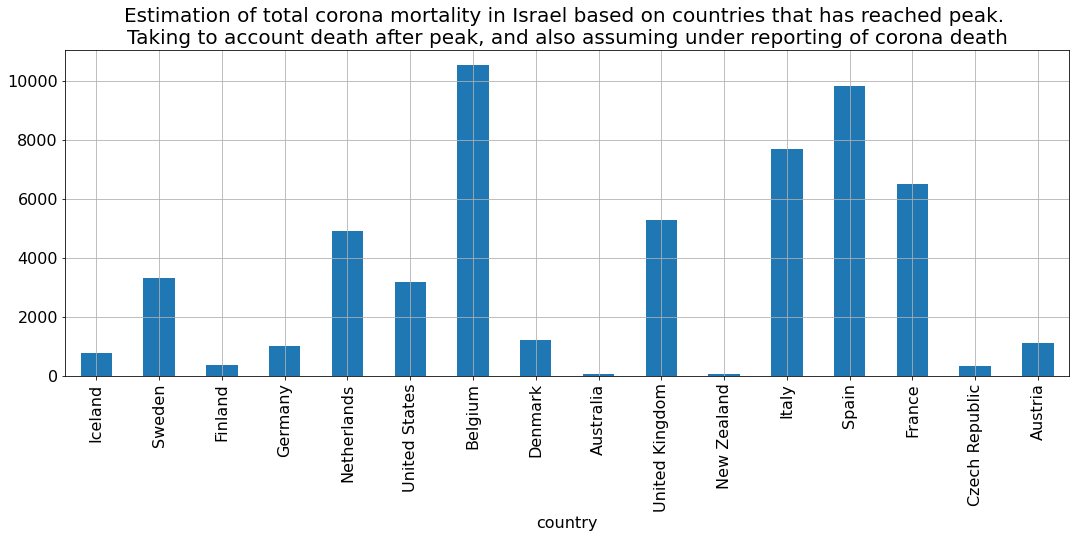

In [111]:
ax = (corona_to_normal_mortality[countries4] / corona_mortality_until_peak_from_all * arbitrary_corona_mortality_underestimation * israel_normal_mortality).plot.bar()
ax.set_title('Estimation of total corona mortality in Israel based on countries that has reached peak. \nTaking to account death after peak, and also assuming under reporting of corona death')

### the difference between various death estimations

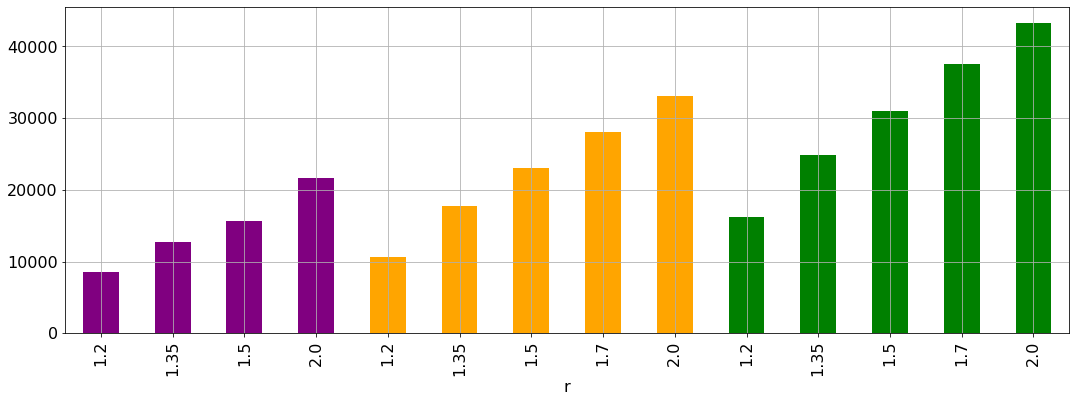

In [105]:
pd.concat([table_summary_3.dead, table_2.dead.groupby('r').mean(), table_1.dead.groupby('r').mean()]).plot.bar(color=['purple',] * 4 + ['orange',] * 5 + ['green',] * 5)

## SIS model checking

In [51]:
from sklearn.linear_model import LinearRegression


In [45]:
cases_tot = pd.read_csv(path_data2.joinpath('total_cases_per_million.csv'), index_col=0, parse_dates=True)

In [46]:
cases_tot = cases_tot[countries4]

cases_tot.plot.scatter(['Spain', 'Italy'], ['Italy', 'Spain'], label=['s', 's'])

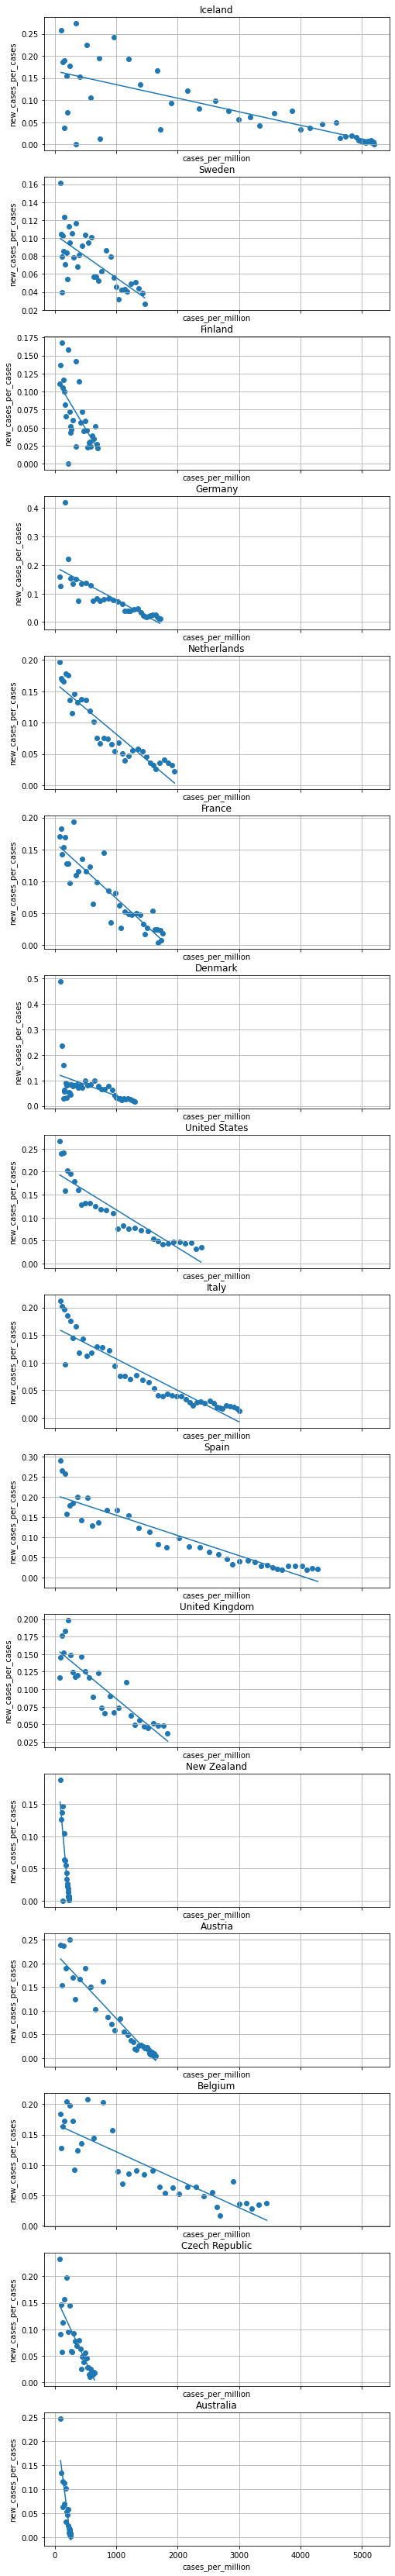

In [58]:
fig, axes = plt.subplots(len(countries4), 1, sharex=True, figsize=(8, 60))

for i, country in enumerate(countries4):
    #country = 'Spain'
    x = cases_tot[country][cases_tot[country] > 80].values
    y = (cases_tot[country].diff() / cases_tot[country])[cases_tot[country] > 80].values
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(x.reshape(-1, 1), y.reshape(-1, 1))  # perform linear regression

    axes[i].scatter(x, y, label='')
    axes[i].plot(x.reshape(-1, 1), linear_regressor.predict(x.reshape(-1, 1)))
    axes[i].set_title(country)
    axes[i].set_xlabel('cases_per_million')
    axes[i].set_ylabel('new_cases_per_cases')

    
fig.savefig(Path.home().joinpath('Downloads/SIS_check.jpeg'))